# Popularity-Based recommendations
- 좋아요 수 기반

In [1]:
import pandas as pd
import numpy as np

In [4]:
frame = pd.read_csv("RS/01/rating_final.csv")

In [6]:
cuisine = pd.read_csv("RS/01/chefmozcuisine.csv")

In [7]:
frame.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [8]:
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [9]:
frame_cuisine = pd.merge(frame, cuisine)

In [30]:
frame_cuisine.head()

,userID,placeID,rating,food_rating,service_rating,Rcuisine
0,U1077,135085,2,2,2,Fast_Food
1,U1108,135085,1,2,1,Fast_Food
2,U1081,135085,1,2,1,Fast_Food
3,U1056,135085,2,2,2,Fast_Food
4,U1134,135085,2,1,2,Fast_Food


In [16]:
frame_cuisine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Data columns (total 6 columns):
userID            1043 non-null object
placeID           1043 non-null int64
rating            1043 non-null int64
food_rating       1043 non-null int64
service_rating    1043 non-null int64
Rcuisine          1043 non-null object
dtypes: int64(4), object(2)
memory usage: 57.0+ KB


In [19]:
frame_cuisine.groupby(['Rcuisine', 'placeID']).size().unstack() # item 기반

placeID,132560,132572,132583,132584,132594,132608,132609,132613,132626,132630,...,135073,135074,135075,135079,135085,135086,135088,135104,135106,135109
Rcuisine,,,,,,,,,,,,,,,,,,,,,
American,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armenian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bar_Pub_Brewery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breakfast-Brunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
Cafe-Coffee_Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cafeteria,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN


In [ ]:
rating_count = pd.DataFrame(frame.groupby('placeID').rating.count())

## 상관관계 기반

In [28]:
geodata = pd.read_csv("RS/01/geoplaces2.csv", encoding='latin1')

In [29]:
geodata.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [31]:
merged1 = pd.merge(geodata, frame_cuisine)

In [32]:
merged1.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,url,Rambience,franchise,area,other_services,userID,rating,food_rating,service_rating,Rcuisine
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,kikucuernavaca.com.mx,familiar,f,closed,none,U1093,2,2,2,Japanese
1,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,kikucuernavaca.com.mx,familiar,f,closed,none,U1066,1,1,1,Japanese
2,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,kikucuernavaca.com.mx,familiar,f,closed,none,U1040,1,1,1,Japanese
3,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,kikucuernavaca.com.mx,familiar,f,closed,none,U1110,2,2,2,Japanese
4,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,kikucuernavaca.com.mx,familiar,f,closed,none,U1121,2,2,2,Japanese


In [39]:
places = geodata[['placeID', 'name']]

In [41]:
places.head()

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata


### Sparse Data

In [43]:
# 피봇 테이블로 행렬을 만들 수 있다
places_crosstab=pd.pivot_table(data=frame, values='rating', index='userID', columns='placeID')
places_crosstab.head() # user 기반 

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
U1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
places_crosstab = places_crosstab.fillna(0)

In [49]:
places_crosstab.corr() # place기반 

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
placeID,,,,,,,,,,,,,,,,,,,,,
132560,1.000000,-0.018078,-0.019766,-0.035183,-0.017023,0.364754,0.397706,-0.019847,-0.018078,-0.022148,...,-0.019847,-0.030178,-0.020321,-0.060398,-0.026743,-0.022264,0.233776,-0.027060,-0.030178,-0.017023
132561,-0.018078,1.000000,-0.024298,-0.043250,-0.020925,-0.027593,-0.022222,-0.024398,-0.022222,-0.027226,...,-0.024398,-0.037097,-0.024980,-0.074246,-0.032874,-0.027369,-0.027369,-0.033264,-0.037097,-0.020925
132564,-0.019766,-0.024298,1.000000,-0.047290,-0.022880,-0.030170,-0.024298,0.218746,-0.024298,-0.029769,...,-0.026676,-0.040562,-0.027313,-0.081181,-0.035945,-0.029925,-0.029925,-0.036371,-0.040562,-0.022880
132572,-0.035183,-0.043250,-0.047290,1.000000,-0.040726,-0.053702,-0.043250,-0.047484,-0.043250,-0.052988,...,0.098133,-0.072199,-0.048617,0.077067,0.230333,-0.053267,-0.053267,0.133796,-0.021104,-0.040726
132583,-0.017023,-0.020925,-0.022880,-0.040726,1.000000,-0.025983,-0.020925,-0.022974,-0.020925,-0.025637,...,-0.022974,-0.034932,-0.023522,-0.069914,-0.030956,0.270606,-0.025772,-0.031323,-0.034932,-0.019704
132584,0.364754,-0.027593,-0.030170,-0.053702,-0.025983,1.000000,0.131066,0.056801,0.289724,0.216114,...,-0.030294,-0.046062,-0.031017,-0.092190,-0.040819,-0.033983,0.454528,-0.041303,-0.046062,-0.025983
132594,0.397706,-0.022222,-0.024298,-0.043250,-0.020925,0.131066,1.000000,0.162650,-0.022222,0.151687,...,-0.024398,-0.037097,-0.024980,-0.074246,-0.032874,-0.027369,0.811948,-0.033264,-0.037097,-0.020925
132608,-0.019847,-0.024398,0.218746,-0.047484,-0.022974,0.056801,0.162650,1.000000,0.536745,0.362961,...,-0.026786,-0.040728,-0.027425,-0.081514,-0.036092,-0.030048,0.200321,-0.036520,-0.040728,-0.022974
132609,-0.018078,-0.022222,-0.024298,-0.043250,-0.020925,0.289724,-0.022222,0.536745,1.000000,0.330599,...,-0.024398,-0.037097,-0.024980,-0.074246,-0.032874,-0.027369,0.182460,-0.033264,-0.037097,-0.020925


In [53]:
places_crosstab.T.corr() # user 기반 

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
userID,,,,,,,,,,,,,,,,,,,,,
U1001,1.000000,0.177522,0.106902,-0.060746,0.004865,0.050441,0.138926,-0.063104,0.048224,-0.050412,...,-0.021230,-0.021230,-0.041666,0.310872,-0.058031,0.010440,NaN,-0.066319,0.080374,-0.035629
U1002,0.177522,1.000000,0.206710,0.100876,0.035967,0.018423,0.011163,-0.070988,0.383969,-0.056710,...,-0.023882,-0.023882,-0.046871,0.358369,-0.065281,0.128066,NaN,0.271774,0.361659,0.332092
U1003,0.106902,0.206710,1.000000,-0.075665,-0.072724,0.267904,-0.076909,-0.078602,0.323740,-0.062792,...,-0.026443,-0.026443,-0.051898,0.045237,-0.072282,0.383298,NaN,-0.018685,0.424286,0.175402
U1004,-0.060746,0.100876,-0.075665,1.000000,0.115228,0.011179,0.075265,-0.065934,-0.029010,-0.052672,...,-0.022181,-0.022181,-0.043534,0.306043,-0.060633,-0.083627,NaN,0.230976,0.027992,-0.037226
U1005,0.004865,0.035967,-0.072724,0.115228,1.000000,-0.069073,0.189893,-0.063371,-0.066038,0.419462,...,-0.021319,-0.021319,-0.041842,0.023587,-0.058276,-0.080376,NaN,-0.066600,0.053809,-0.035780
U1006,0.050441,0.018423,0.267904,0.011179,-0.069073,1.000000,0.006087,-0.074656,0.012102,-0.059640,...,-0.025116,-0.025116,-0.049293,0.006538,-0.068654,0.048031,NaN,-0.035961,0.158479,0.250098
U1007,0.138926,0.011163,-0.076909,0.075265,0.189893,0.006087,1.000000,0.041886,0.157136,0.070746,...,-0.022546,-0.022546,-0.044250,0.287230,-0.061629,0.035109,NaN,-0.070432,0.021339,-0.037838
U1008,-0.063104,-0.070988,-0.078602,-0.065934,-0.063371,-0.074656,0.041886,1.000000,-0.071376,-0.054717,...,-0.023042,-0.023042,0.542686,-0.071983,-0.062986,-0.086873,NaN,-0.071983,-0.087237,-0.038671
U1009,0.048224,0.383969,0.323740,-0.029010,-0.066038,0.012102,0.157136,-0.071376,1.000000,0.013576,...,-0.024012,-0.024012,-0.047127,0.250042,-0.065638,0.182371,NaN,0.087515,0.333333,-0.040299


In [64]:
xxx = places_crosstab.T.corr()
xxx['U1004'].sort_values(ascending=False).dropna()

userID
U1004    1.000000
U1016    0.320195
U1132    0.306043
U1024    0.285868
U1061    0.248338
U1136    0.230976
U1053    0.225464
U1097    0.225464
U1078    0.223567
U1090    0.202070
U1109    0.202070
U1055    0.190111
U1108    0.185481
U1071    0.185063
U1125    0.179406
U1104    0.177271
U1054    0.174149
U1098    0.169472
U1096    0.162267
U1059    0.150244
U1106    0.147356
U1025    0.144164
U1005    0.115228
U1126    0.109574
U1081    0.104678
U1022    0.103047
U1101    0.102772
U1002    0.100876
U1058    0.080842
U1075    0.078423
           ...   
U1102   -0.050386
U1080   -0.052108
U1010   -0.052672
U1041   -0.053230
U1035   -0.053230
U1048   -0.054255
U1100   -0.055418
U1103   -0.056526
U1091   -0.056617
U1115   -0.057179
U1085   -0.060101
U1133   -0.060633
U1087   -0.060746
U1001   -0.060746
U1037   -0.061003
U1083   -0.061663
U1111   -0.061663
U1029   -0.061733
U1123   -0.061733
U1116   -0.063470
U1093   -0.063470
U1046   -0.064513
U1008   -0.065934
U1095   -0.068709
U10

# Shikit-learn
### 프로토타입으로 이용 
[shikit-learn](http://scikit-learn.org/stable/)

1. load: 작은 데이터
2. fetch: 큰 데이터
3. make: 데이터 임의로 생성

In [65]:
from sklearn.datasets import load_iris

In [66]:
type(load_iris)

function

In [67]:
data = load_iris()

In [75]:
type(data)

sklearn.utils.Bunch

In [71]:
data

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
      

In [74]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [79]:
data.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [81]:
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## 기계 학습
[기계 학습](http://solarisailab.com/archives/1785)


- 지도 학습(supervised learning)
    1. classification
    2. regression
- 비지도 학습: 클러스터링
- 강화 학습

In [86]:
iris = pd.DataFrame(data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [87]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [88]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
iris2 = pd.DataFrame(data.target)

In [91]:
iris2.rename({0: 'target'}, axis=1, inplace=True)

In [93]:
iris = pd.concat([iris, iris2], axis=1)

In [94]:
iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [95]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [96]:
import seaborn as sns

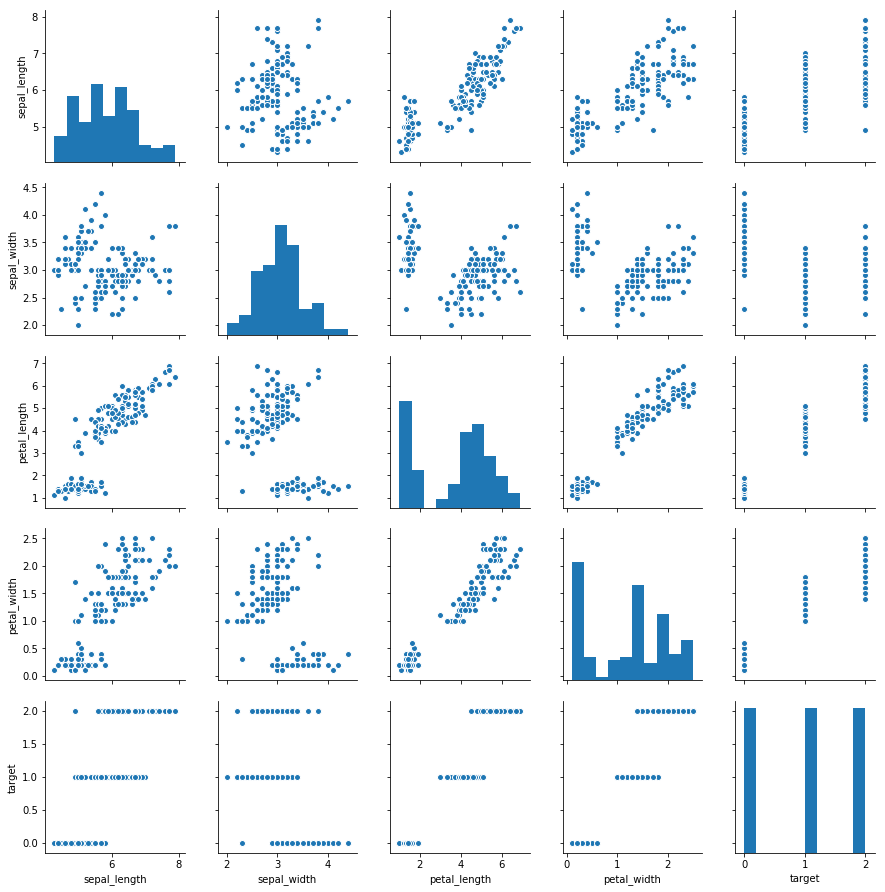

In [97]:
sns.pairplot(iris)

In [98]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [99]:
import matplotlib.pyplot as plt

In [100]:
plt.style.use('ggplot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a9ceda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10aabe080>]], dtype=object)

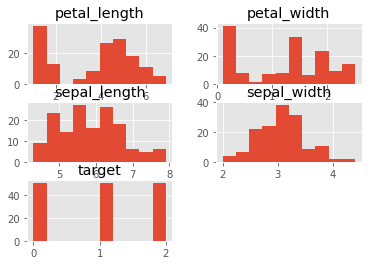

In [102]:
iris.hist()

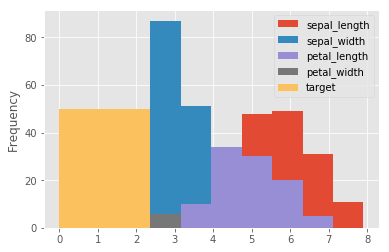

In [103]:
iris.plot.hist()

## 기계 학습 과정
1. 쓸 알고리즘을 결정한다.
    - highper parameter 를 어떻게 하느냐에 따라서 선택하는 알고리즘이 변화한다. : 
2. fitting
    - overfitting: 가지고 있는 정보를 모두다 쓰면 안된다. 
    - 성능이 완벽하다는 것은 응용을 못 하는 것한다.
3. 


## KNN
KNeighborClassifier
![KNN](http://www.trickybook.com/wp-content/uploads/2015/07/implementation-of-KNN-algoritm-in-C-.png)

In [106]:
# category로 분류하는 기계 학습
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=8) # n_neighbors=5가 defalut
# row 별로 학습을 시킨다. 

In [114]:
knn.fit(iris.iloc[:, :-1], iris.iloc[:,-1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [115]:
knn.predict([[3, 3, 3, 3]])

array([1])

In [116]:
data.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

## DecisionTreeClassifier 

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
tree = DecisionTreeClassifier()

In [119]:
tree.fit(iris.iloc[:, :-1], iris.iloc[:,-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
tree.predict([[3, 3, 3, 3]])

array([2])

## 최종적으로 데이터를 다 써야하지만 학습으로 모든 데이터를 쓰면 안된다

In [121]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:,-1], test_size=0.3) 
# random 하게 나눈다. 

In [132]:
len(X_train), len(X_test)

(105, 45)

In [133]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [136]:
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix(y_test, knn.predict(X_test))
# row 실제 값, column 예측 값

array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

## 이렇게 확인을 하고 난 후 모든 데이터를 학습시킨다.

## CrossValidation
- overfitting을 막는 parameter를 찾는 것이 목적이다.
- 하나 학습 후 하나 테스트 그것을 계속 반복한다.

## Spark VS PredictionIO 
- Prediction IO는 보안의 문제 발생

## 성능 측정

In [139]:
knn.score(iris.iloc[:, :-1], iris.iloc[:,-1])

0.97333333333333338

In [140]:
knn.score(X_train, y_train)

0.99047619047619051

## DummyClassifier
- 처음부터 더미로 확인하고 난 후에 기계 학습을 시작한다.

In [141]:
from sklearn.dummy import DummyClassifier

In [142]:
# 간단하게 사람들이 이용하는 전략으로 예측
dummy  = DummyClassifier()

In [143]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [144]:
dummy.score(X_train, y_train)

0.2857142857142857

## Preprocessing

In [151]:
iris2 = sns.load_dataset('iris')
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [148]:
iris2.species = iris2.species.map({'setosa':0, 'versicolor': 1, 'virginica':2})

In [150]:
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [152]:
x = pd.get_dummies(iris2.species)

In [154]:
x 
# 이를 concat하거나 merge 한 다음에 species를 제거한다. 

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


## Schikit 을 이용한 encoding
- 원래 데이터와 수치화한 데이터를 같이 이용할 수 있다

In [158]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [160]:
labelencoder.fit_transform(iris2.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [161]:
labelencoder.inverse_transform([0])

array(['setosa'], dtype=object)

### onehotencoder
- 카테고리 별로 열이 생긴다

### labelencoder
- 크기의 차이가 고려된다. 

In [164]:
iris2 = pd.concat([iris2, x], axis=1)

In [165]:
iris2

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


In [167]:
knn.fit(iris2.iloc[:, :4], iris2.iloc[:,5:])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [169]:
knn.predict([[3, 2, 4, 3]])

array([[0, 1, 0]], dtype=uint8)